In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,9]
%matplotlib inline

In [32]:
df = pd.read_csv('data/crypto.csv')

In [33]:
df

,Asset_Name,timestamp,Close
0,Bitcoin Cash,2018-01-01,2374.5900
1,Bitcoin Cash,2018-01-02,2323.3200
2,Bitcoin Cash,2018-01-03,2551.2850
3,Bitcoin Cash,2018-01-04,2557.6467
4,Bitcoin Cash,2018-01-05,2354.4433
...,...,...,...
18097,Dogecoin,2021-09-17,0.2416
18098,Dogecoin,2021-09-18,0.2401
18099,Dogecoin,2021-09-19,0.2413
18100,Dogecoin,2021-09-20,0.2331


In [70]:
bit = df[df['Asset_Name'] == 'Bitcoin']

In [35]:
bit

,Asset_Name,timestamp,Close
2720,Bitcoin,2018-01-01,13850.1760
2721,Bitcoin,2018-01-02,13468.6980
2722,Bitcoin,2018-01-03,14743.4240
2723,Bitcoin,2018-01-04,15107.7920
2724,Bitcoin,2018-01-05,15158.4920
...,...,...,...
4075,Bitcoin,2021-09-17,47769.5096
4076,Bitcoin,2021-09-18,47333.4914
4077,Bitcoin,2021-09-19,48295.5087
4078,Bitcoin,2021-09-20,47272.4743


In [36]:
eth = df[df['Asset_Name'] == 'Ethereum']

In [37]:
eth

,Asset_Name,timestamp,Close
6800,Ethereum,2018-01-01,738.5075
6801,Ethereum,2018-01-02,757.3900
6802,Ethereum,2018-01-03,859.6750
6803,Ethereum,2018-01-04,935.4225
6804,Ethereum,2018-01-05,941.2525
...,...,...,...
8155,Ethereum,2021-09-17,3570.6356
8156,Ethereum,2021-09-18,3401.4414
8157,Ethereum,2021-09-19,3433.6931
8158,Ethereum,2021-09-20,3334.9971


<Axes: xlabel='timestamp'>

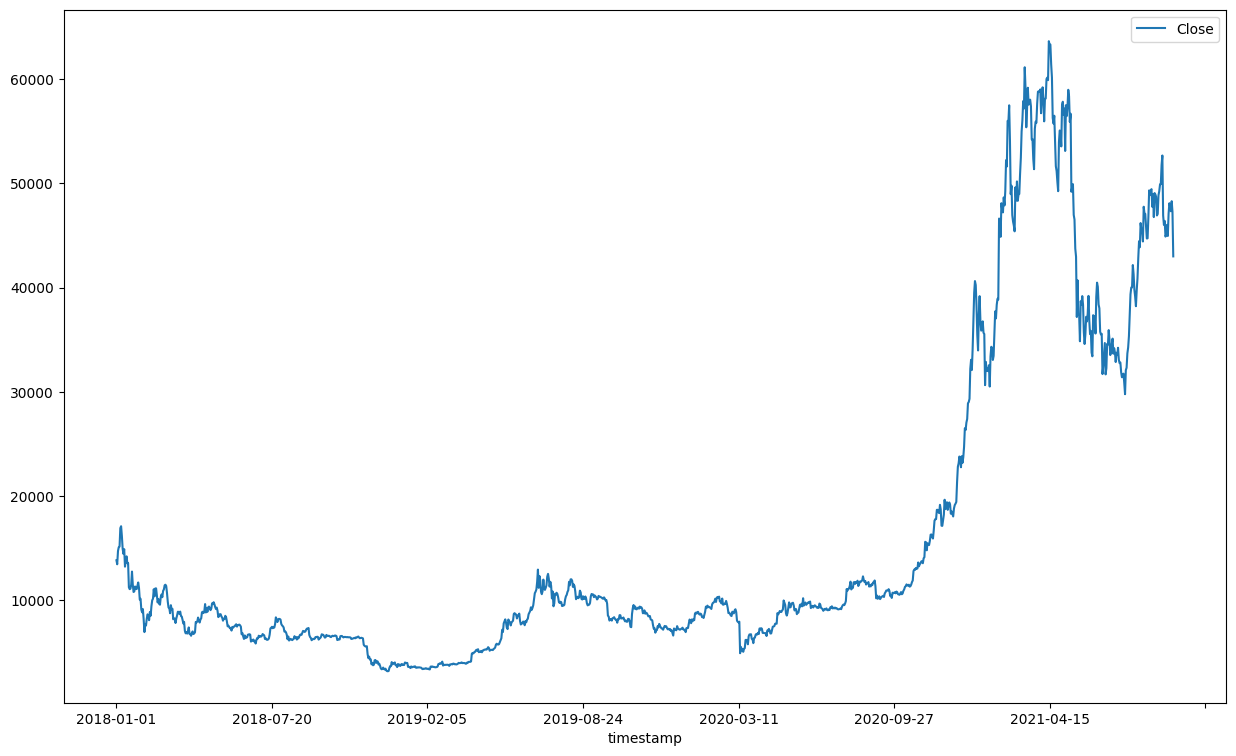

In [38]:
bit.plot(x='timestamp', y='Close')

<Axes: xlabel='timestamp'>

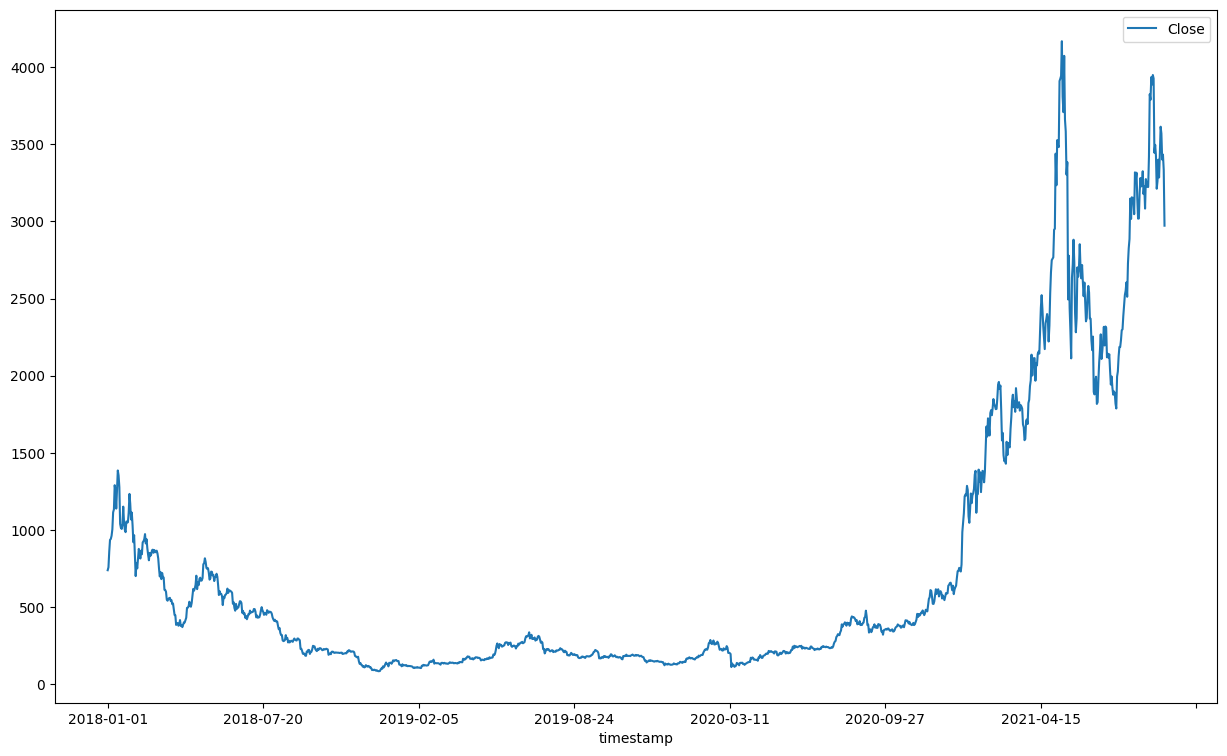

In [39]:
eth.plot(x='timestamp', y='Close')

In [40]:
df2 = df[(df['Asset_Name'] == 'Bitcoin') | (df['Asset_Name'] == 'Ethereum')]

In [41]:
df2.value_counts()

Asset_Name  timestamp   Close     
Bitcoin     2018-01-01  13850.1760    1
Ethereum    2019-04-02  141.4579      1
            2019-03-25  135.6180      1
            2019-03-26  133.8480      1
            2019-03-27  133.8550      1
                                     ..
Bitcoin     2020-06-27  9163.9985     1
            2020-06-28  9006.1171     1
            2020-06-29  9125.0372     1
            2020-06-30  9191.2186     1
Ethereum    2021-09-21  2972.6033     1
Name: count, Length: 2720, dtype: int64

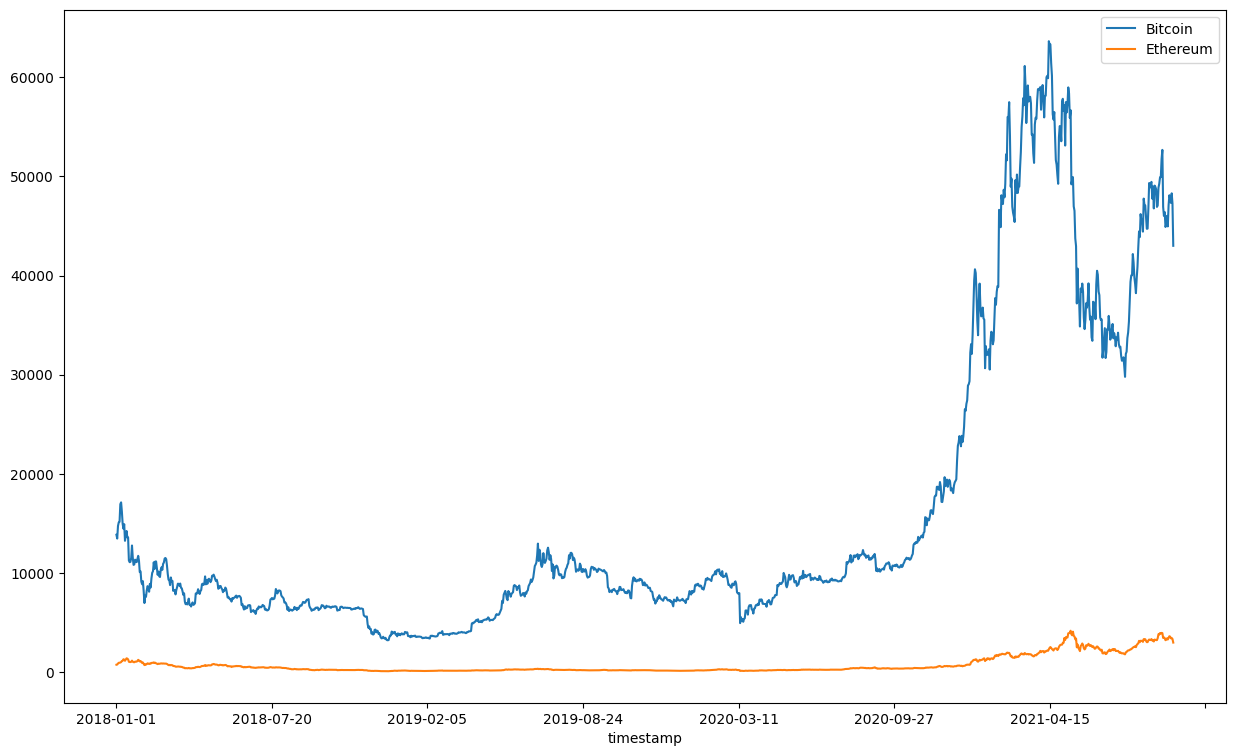

In [42]:
fig, ax = plt.subplots(figsize=(15,9))

for name, group in df2.groupby(by='Asset_Name'):
    group.plot(x='timestamp', y='Close', ax=ax, label=name, logy = False)
    

plt.show()

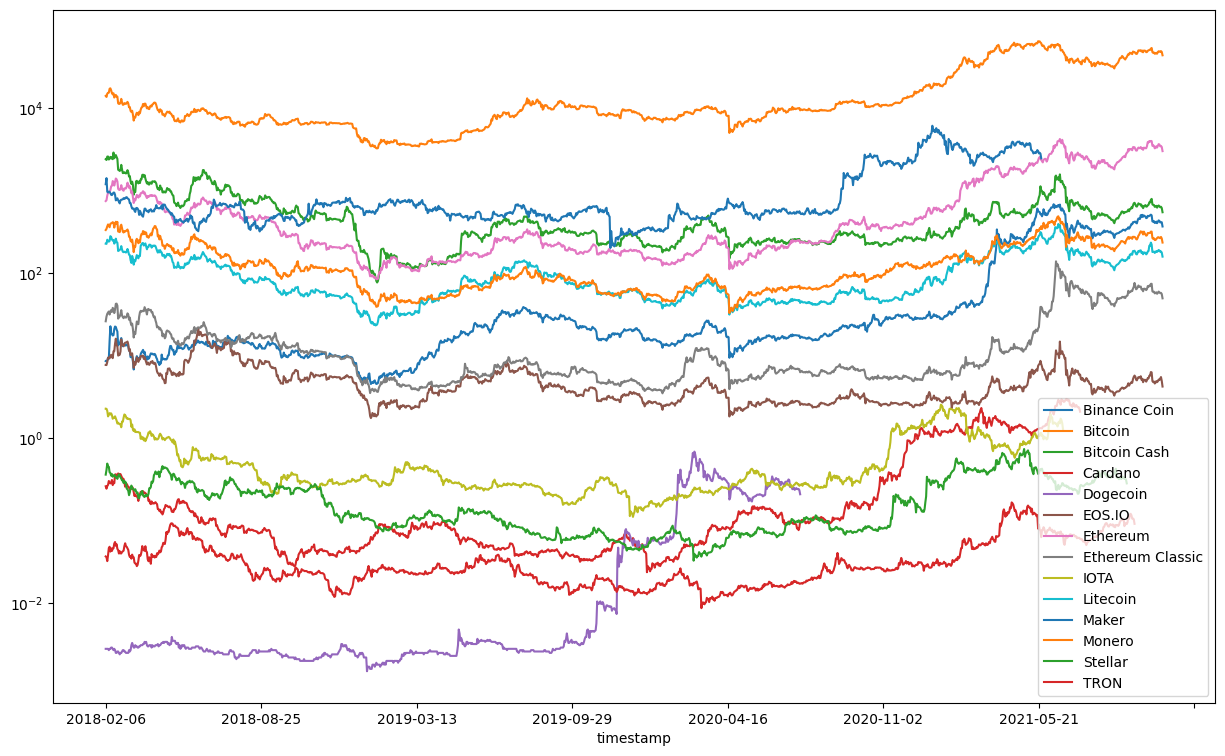

In [43]:
fig, ax = plt.subplots(figsize=(15,9))

for name, group in df.groupby(by='Asset_Name'):
    group.plot(x='timestamp', y='Close', ax=ax, label=name, logy = True)
    

plt.show()

In [44]:
# Q1a) Ethereum follows the general trend of Bitcoin
# Q1b) Litecoin also followed a similar trend 
# Q1c) Dogecoin doesn't follow the same trend because it was heavily influenced by social media trends

In [85]:
# Q2
bit = bit[['Close','timestamp']].copy()
bit['SMA3'] = bit['Close'].rolling(3).mean()
bit['SMA7'] = bit['Close'].rolling(7).mean()
bit['SMA14'] = bit['Close'].rolling(14).mean()
bit.dropna(inplace=True)
bit.head()

,Close,timestamp,SMA3,SMA7,SMA14
2777,10327.8267,2018-02-27,9860.352800,10160.264300,10135.671543
2778,10569.9667,2018-02-28,10163.405033,10076.497157,10281.121071
2779,10306.8050,2018-03-01,10401.532800,10057.058343,10342.523336
2780,10915.0683,2018-03-02,10597.280000,10215.686200,10407.075121
2781,11052.7967,2018-03-03,10758.223333,10346.527871,10470.303336


<Axes: xlabel='timestamp'>

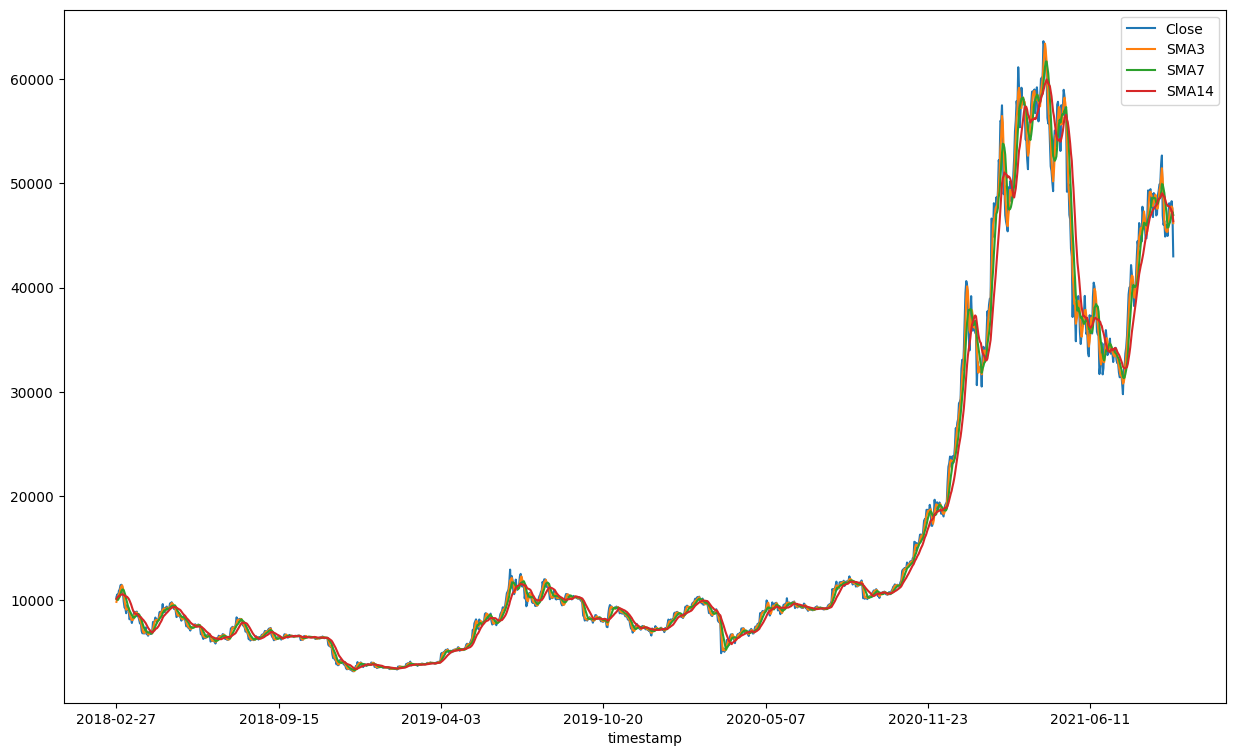

In [86]:
bit.set_index('timestamp')[['Close', 'SMA3','SMA7','SMA14']].plot(label='Bitcoin',
                                  figsize=(15, 9))

In [84]:
# Q2b) When looking at generic trends for long term investments a rolling average is more useful; 
#      however, when making short term trades the close proce is better